# 4.10    Part 1


Context:
1. Import libriaries and Data 
2. Addressing PII data
3. Creating regions and comparing spendings 
4. Creating an exclusion flag for low-activity customers
5. Create a profiling variable based on age, income, certain goods
6. Vizualization 
7. Aggregate the max, mean, and min variables on a customer-profile level
8. Compare customer profiles with regions and departments
9. Bar Charts
10. Export final data

## 1 Import libriaries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data 
ords_prods_all = pd.read_pickle(r'C:\Users\irikh\iCloudDrive\Data analytics\Instacart basket Analysis\02 Data\Prepared Data\ords_prods_all.pkl')

In [3]:
ords_prods_all.shape

(32404859, 33)

## 2 Addressing PII data


In [4]:
ords_prods_all.head ()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,US state,Age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Addressing PII data
ords_prods_all_2 = ords_prods_all.drop(columns = ['First Name', 'Surname'])

In [6]:
ords_prods_all_2.head ()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_frequency,frequency_flag,Gender,US state,Age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
ords_prods_all_2.shape

(32404859, 31)

## 3 Creating regions and comparing spendings 

In [8]:
# Defining regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Assign States in 'state' column to a region

ords_prods_all_2.loc[ords_prods_all_2['US state'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_all_2.loc[ords_prods_all_2['US state'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_all_2.loc[ords_prods_all_2['US state'].isin(South), 'region'] = 'South'
ords_prods_all_2.loc[ords_prods_all_2['US state'].isin(West), 'region'] = 'West'

In [10]:
# Checking values in new column
ords_prods_all_2['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# Checking choosed columns
ords_prods_all_2[['region']].head(60)

,region
0,South
1,South
2,South
3,South
4,South
5,South
6,South
7,South
8,South
9,South


In [12]:
ords_prods_all_2. columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_frequency', 'frequency_flag',
       'Gender', 'US state', 'Age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income', '_merge', 'region'],
      dtype='object')

In [13]:
# Making Crosstab regions and Spendings 
crosstab = pd.crosstab(ords_prods_all_2['region'], ords_prods_all_2['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [15]:
# Сopy to clipboard
crosstab.to_clipboard()

## 4 Creating an exclusion flag for low-activity customers

In [16]:
# Creating flag 1 
ords_prods_all_2.loc[ords_prods_all_2['order_number'] < 5, 'customer_activity'] = 'low activity'

In [17]:
# Creating flag 2
ords_prods_all_2.loc[ords_prods_all_2['order_number'] >= 5, 'customer_activity'] = 'high activity'

In [18]:
# Checking values in new column
ords_prods_all_2['customer_activity'].value_counts(dropna = False)

customer_activity
high activity    24414877
low activity      7989982
Name: count, dtype: int64

In [19]:
# Assign low activity profiles to new dataframe
low_activity_customers = ords_prods_all_2[ords_prods_all_2['customer_activity'] == 'low activity']

In [20]:
# Creating path
path = r'C:\Users\irikh\iCloudDrive\Data analytics\Instacart basket Analysis'

In [21]:
# Export and save low activity profiles
low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [22]:
# Assign high activity profiles to new dataframe
high_activity_customers = ords_prods_all_2[ords_prods_all_2['customer_activity'] == 'high activity']

In [23]:
# Export and save high activity profiles
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [24]:
high_activity_customers.shape

(24414877, 33)

In [25]:
ords_prods_all_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,US state,Age,date_joined,number_of_dependants,marital_status,income,_merge,region,customer_activity
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,low activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,low activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,low activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,low activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high activity


In [26]:
ords_prods_all_2.shape

(32404859, 33)

## 5 Creating a profiling variable based on age, income, certain goods

### Age groups

In [28]:
high_activity_customers.loc[high_activity_customers['Age'] <= 29, 'age_group'] = '18-29'
high_activity_customers.loc[(high_activity_customers['Age'] > 29) & (high_activity_customers['Age'] < 40), 'age_group'] = '30-39'
high_activity_customers.loc[(high_activity_customers['Age'] > 39) & (high_activity_customers['Age'] < 50), 'age_group'] = '40-49'
high_activity_customers.loc[(high_activity_customers['Age'] > 49) & (high_activity_customers['Age'] < 60), 'age_group'] = '50-59'
high_activity_customers.loc[(high_activity_customers['Age'] > 59) & (high_activity_customers['Age'] < 70), 'age_group'] = '60-69'
high_activity_customers.loc[high_activity_customers['Age'] > 69, 'age_group'] = '70 and over'

In [29]:
# Check result
high_activity_customers['age_group'].value_counts(dropna = False)

age_group
18-29          4590260
70 and over    4579145
40-49          3852487
30-39          3828715
50-59          3812817
60-69          3751453
Name: count, dtype: int64

In [30]:
high_activity_customers.head ()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,US state,Age,date_joined,number_of_dependants,marital_status,income,_merge,region,customer_activity,age_group
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,30-39
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,30-39
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,30-39
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,30-39
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high activity,30-39


### Income groups

In [31]:
high_activity_customers.loc[high_activity_customers['income'] <= 75000, 'income_group'] = 'Lower'
high_activity_customers.loc[(high_activity_customers['income'] > 75000) & (high_activity_customers['income'] <= 120000), 'income_group'] = 'Middle'
high_activity_customers.loc[high_activity_customers['income'] > 120000, 'income_group'] = 'Upper'

In [32]:
# Check result
high_activity_customers['income_group'].value_counts(dropna = False)

income_group
Middle    9395071
Lower     7768591
Upper     7251215
Name: count, dtype: int64

In [33]:
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,number_of_dependants,marital_status,income,_merge,region,customer_activity,age_group,income_group
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,31,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,31,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower


### Department profiling

In [34]:
# Importing department data
df_dep =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [35]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)                             

In [37]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Merging the departments dataframe with high_active_customers dataframe.
df_depart = high_activity_customers.merge(df_dep, on = 'department_id')

In [39]:
df_depart.head ()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,marital_status,income,_merge,region,customer_activity,age_group,income_group,department
0,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower,beverages
1,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower,beverages
2,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower,beverages
3,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower,beverages
4,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,2/17/2019,3,married,40423,both,South,high activity,30-39,Lower,beverages


In [40]:
# checking the merge result.
df_depart[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,1,7,beverages
1,1,7,beverages
2,1,7,beverages
3,1,7,beverages
4,1,7,beverages
5,1,7,beverages
6,1,7,beverages
7,1,7,beverages
8,1,7,beverages
9,15,7,beverages


In [41]:
df_depart.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_frequency', 'frequency_flag',
       'Gender', 'US state', 'Age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income', '_merge', 'region', 'customer_activity',
       'age_group', 'income_group', 'department'],
      dtype='object')

### Dependance profile

In [42]:
# Creating flag for number of dependents in a household.

df_depart.loc[(df_depart['marital_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_depart['number_of_dependants'] == 0), 'customer_profile'] = 'Single adult'

df_depart.loc[(df_depart['marital_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_depart['number_of_dependants'] >0), 'customer_profile'] = 'Young parent'

df_depart.loc[(df_depart['marital_status']=='married') & (df_depart['number_of_dependants'] <=2), 'customer_profile'] = 'Family'

df_depart.loc[(df_depart['marital_status']=='married') & (df_depart['number_of_dependants'] >2), 'customer_profile'] = 'Big Family'

In [43]:
# Check totals
df_depart['customer_profile'].value_counts(dropna = False)

customer_profile
Family          11391849
Single adult     6105002
Big Family       5746627
Young parent     1171399
Name: count, dtype: int64

In [44]:
# Checking the results.
df_depart[['marital_status', 'number_of_dependants', 'customer_profile']].head(30)

,marital_status,number_of_dependants,customer_profile
0,married,3,Big Family
1,married,3,Big Family
2,married,3,Big Family
3,married,3,Big Family
4,married,3,Big Family
5,married,3,Big Family
6,married,3,Big Family
7,married,3,Big Family
8,married,3,Big Family
9,divorced/widowed,0,Single adult


In [45]:
df_depart.shape

(24414877, 37)

## 6 Vizualization 

Text(0.5, 1.0, 'Distribution of Age Groups')

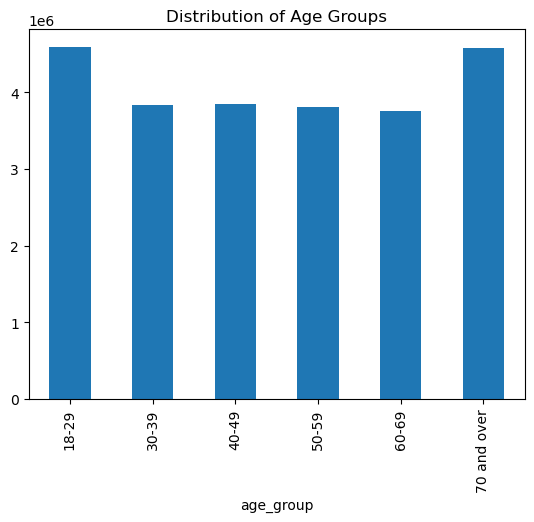

In [46]:
# Creating bar chart for 'age_category' 
bar_age_group = df_depart['age_group'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

In [47]:
# Exporting bar chart.
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

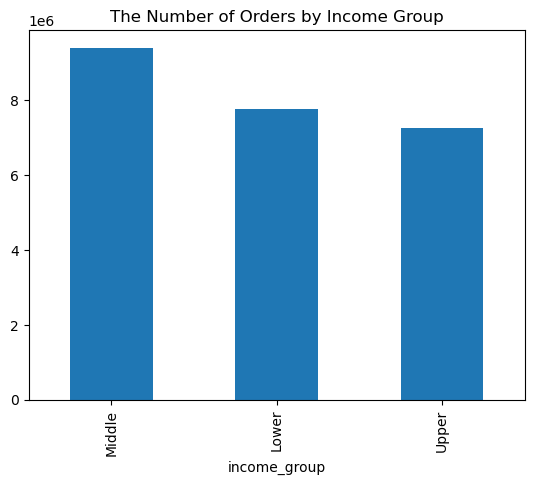

In [48]:
# Bar chart of income_group
bar_income_group = df_depart['income_group'].value_counts().plot.bar(title ='The Number of Orders by Income Group')

In [49]:
# Exporting bar chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

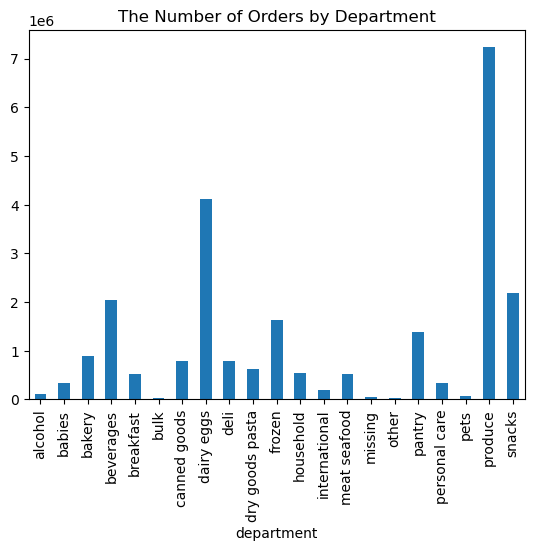

In [50]:
# Creating a bar chart for departments.
bar_department = df_depart['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [51]:
# Exporting bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

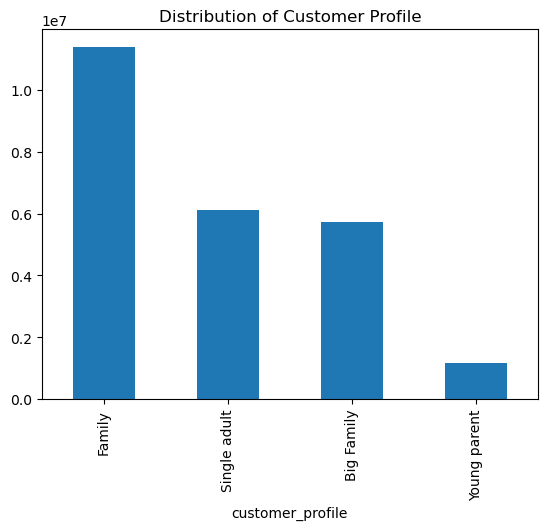

In [52]:
# Creating a bar chart for 'customer_profile'
bar_family_status = df_depart['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

In [53]:
# Exporting bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

## 7 Aggregate the max, mean, and min variables on a customer-profile level 

### Age Group of Customer

In [54]:
# Aggregation min. max. and mean on customer's 'income_class' for usage and expenditure.
age_group_agg = df_depart.groupby('age_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [55]:
age_group_agg

days_since_last_order                  prices                    
                              min   max       mean    min      max       mean
age_group                                                                    
18-29                         0.0  30.0  10.101130    1.0  99999.0  12.182256
30-39                         0.0  30.0  10.084290    1.0  99999.0  11.850195
40-49                         0.0  30.0  10.064481    1.0  99999.0  12.037898
50-59                         0.0  30.0  10.101795    1.0  99999.0  11.665500
60-69                         0.0  30.0  10.067959    1.0  99999.0  11.407166
70 and over                   0.0  30.0  10.087914    1.0  99999.0  11.759889

### Income group of Customer

In [56]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_group_agg = df_depart.groupby('income_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [57]:
income_group_agg

days_since_last_order                  prices                    
                               min   max       mean    min      max       mean
income_group                                                                  
Lower                          0.0  30.0  10.153282    1.0  14900.0   7.461231
Middle                         0.0  30.0  10.064383    1.0  99999.0   9.336571
Upper                          0.0  30.0  10.039347    1.0  99999.0  19.735685

### Dependance of Customer

In [58]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_depart.groupby('customer_profile',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [59]:
customer_profile_agg

days_since_last_order                  prices           \
                                   min   max       mean    min      max   
customer_profile                                                          
Big Family                         0.0  30.0  10.109567    1.0  99999.0   
Family                             0.0  30.0  10.090079    1.0  99999.0   
Single adult                       0.0  30.0  10.063556    1.0  99999.0   
Young parent                       0.0  30.0  10.031737    1.0  99999.0   

                             
                       mean  
customer_profile             
Big Family        11.546054  
Family            11.978931  
Single adult      12.029888  
Young parent      10.699303

### Departments for Customers

In [60]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
department_customer_profile_agg = df_depart.groupby(['customer_profile', 'department'])[['days_since_last_order','prices']].agg(['min','max','mean'])

In [61]:
department_customer_profile_agg

days_since_last_order                  prices  \
                                                 min   max       mean    min   
customer_profile department                                                    
Big Family       alcohol                         0.0  30.0   9.029309    1.0   
                 babies                          0.0  30.0   9.028144    1.0   
                 bakery                          0.0  30.0  10.101450    1.0   
                 beverages                       0.0  30.0  10.093934    1.0   
                 breakfast                       0.0  30.0  10.315935    1.0   
...                                              ...   ...        ...    ...   
Young parent     pantry                          0.0  30.0   9.803689    1.0   
                 personal care                   0.0  30.0  10.558776    1.0   
                 pets                            0.0  30.0  10.567542    1.0   
                 produce                         0.0  30.0   9.852803    1.0   
                 snacks                          0.0  30.0   9.924084    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.312518  
                 babies         15.0  7.645708  
                 bakery         15.0  7.868731  
                 beverages      15.0  7.677720  
                 breakfast      14.9  8.011406  
...                              ...       ...  
Young parent     pantry         20.0  8.019841  
                 personal care  15.0  7.922020  
                 pets           15.0  7.906802  
                 produce        15.0  8.003789  
                 snacks          7.0  4.265507  

[84 rows x 6 columns]

## 8 Compare customer profiles with regions and departments

In [62]:
# Checking the relationship of 'age_category' & 'income_class' of customers profile in differnet regions.
profile_age_region = df_depart.groupby('region')[['income_group','age_group']].value_counts().reset_index(name='count')

In [63]:
profile_age_region

,region,income_group,age_group,count
0,Midwest,Lower,18-29,639019
1,Midwest,Lower,30-39,557914
2,Midwest,Upper,70 and over,486255
3,Midwest,Upper,50-59,427533
4,Midwest,Middle,70 and over,417495
...,...,...,...,...
67,West,Lower,70 and over,186026
68,West,Lower,50-59,161449
69,West,Lower,60-69,144589
70,West,Upper,18-29,14129


In [64]:
# Checking income_class by regions.
region_income = pd.crosstab(df_depart['income_group'],df_depart['region'], dropna = False)

In [65]:
region_income

region,Midwest,Northeast,South,West
income_group,,,,
Lower,1796782,1358088,2601654,2012067
Middle,2187807,1669773,3139040,2398451
Upper,1727167,1287410,2388392,1848246


## 9 Bar Charts

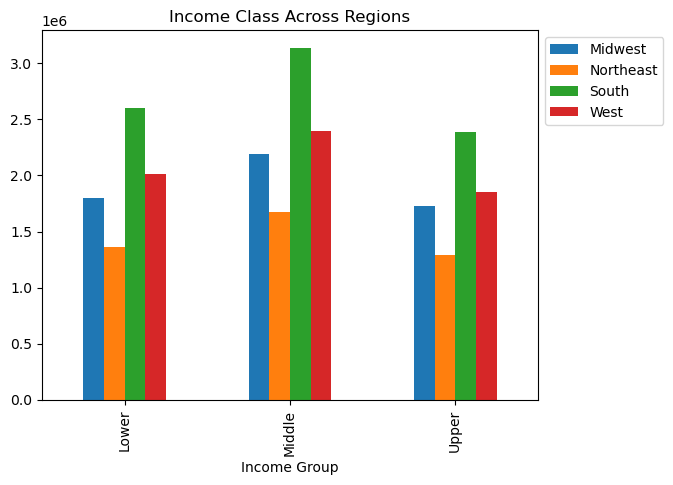

In [66]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [67]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [68]:
# Pivot the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_family_department = df_depart.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

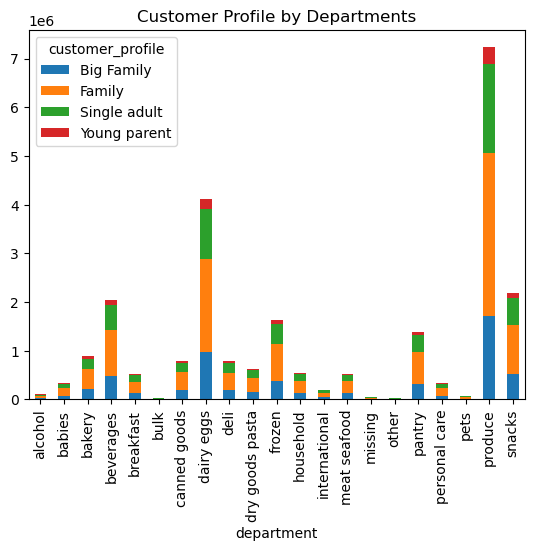

In [69]:
#stacked bar graph
stacked_family_department = customer_family_department.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [70]:
# Export stacked bar chart
stacked_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_family_department.png'))

In [71]:
# Checking customer_profile by region
customer_by_region = pd.crosstab(df_depart['customer_profile'],df_depart['region'], dropna = False)

In [72]:
customer_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1309430,1022404,1914220,1500573
Family,2689385,2022798,3777311,2902355
Single adult,1436961,1065138,2038334,1564569
Young parent,275980,204931,399221,291267


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

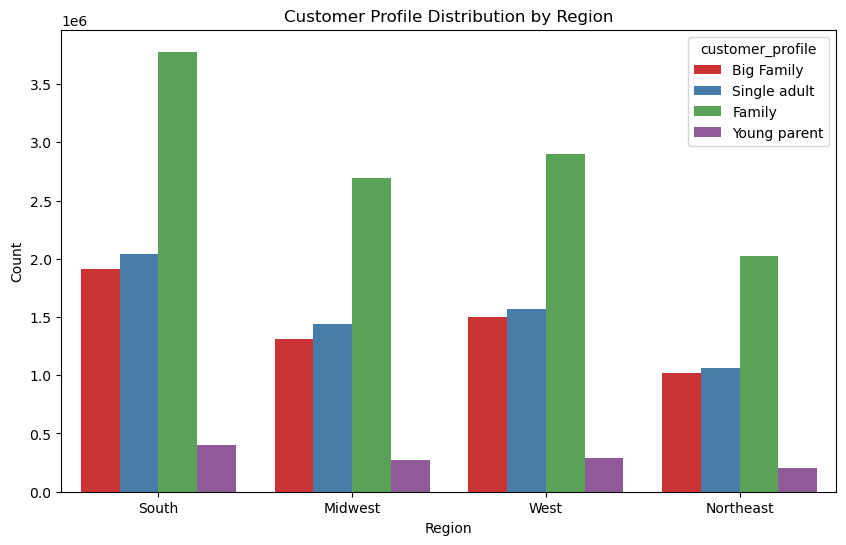

In [75]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_customer_by_region = sns.countplot(x='region', hue='customer_profile', palette='Set1', data=df_depart)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

In [76]:
# exporting Countplot bar chart
countplot_customer_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_customer_by_region.png'))

## 10. Export final data 

In [77]:
df_depart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_data.pkl'))